In [1]:
%config Completer.use_jedi = False

In [2]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

import matplotlib.pyplot as plt
import cmocean as cm
import xarray as xr
import numpy as np
import IPython.display
import cosima_cookbook as cc
import pandas as pd
import gsw

In [3]:
session = cc.database.create_session()

In [4]:
experiment = "01deg_jra55v140_iaf_cycle4" # Selecting the experiment with the interannualy forced run, cycle-4

In [83]:
varList = cc.querying.get_variables(session, experiment=experiment)

In [ ]:
varList["frequency"].unique()

In [61]:
i = 0

In [82]:
varList.loc[i:i+10]#.loc[varList["name"].str.lower().str.contains("grid")]

,name,long_name,units,frequency,ncfile,cell_methods,# ncfiles,time_start,time_end


In [77]:
i+=10

In [48]:
dxt = cc.querying.getvar(experiment, "dxt", session, start_time="1990-01-01", end_time="2019-01-01", frequency="1 monthly", n=1)


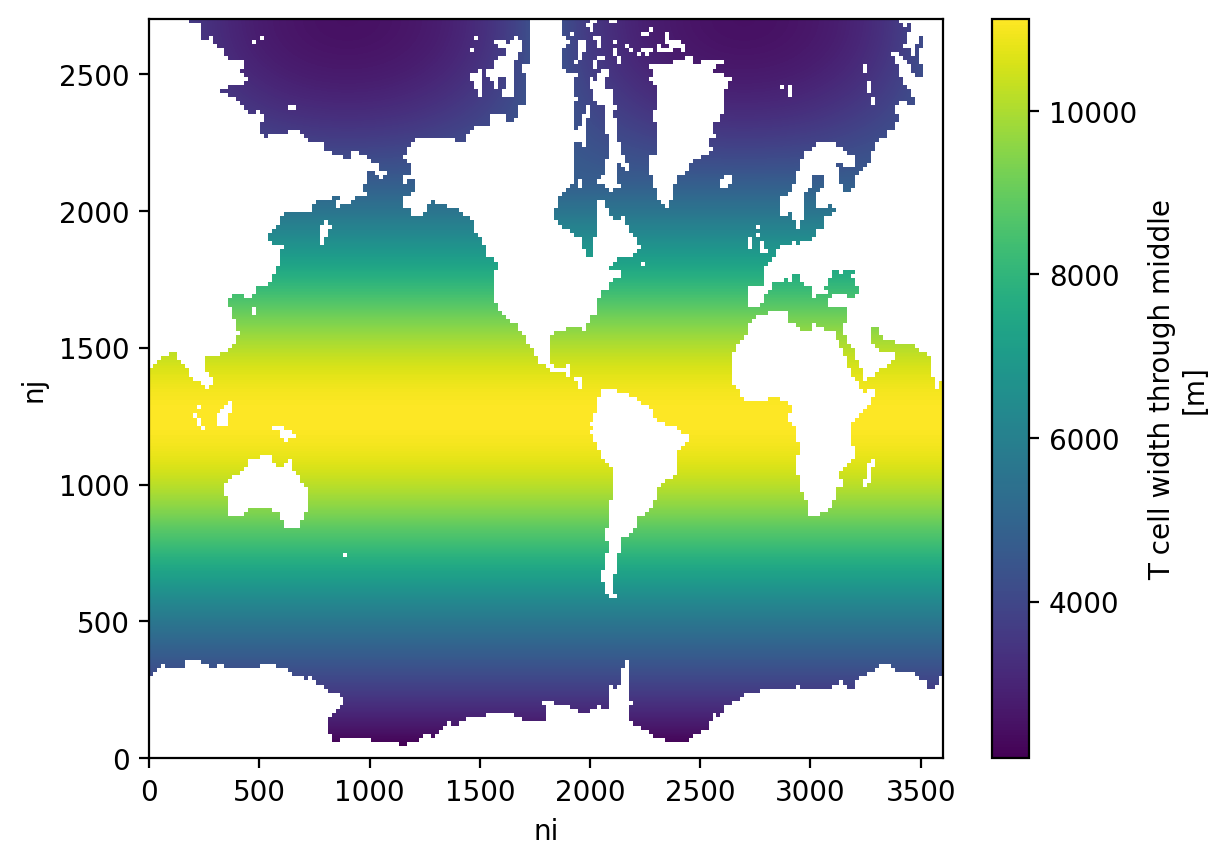

In [51]:
dxt.plot()

In [5]:
Omega = xr.open_dataset("/g/data/g40/an1995/WMT/1990.nc")

0.3.0


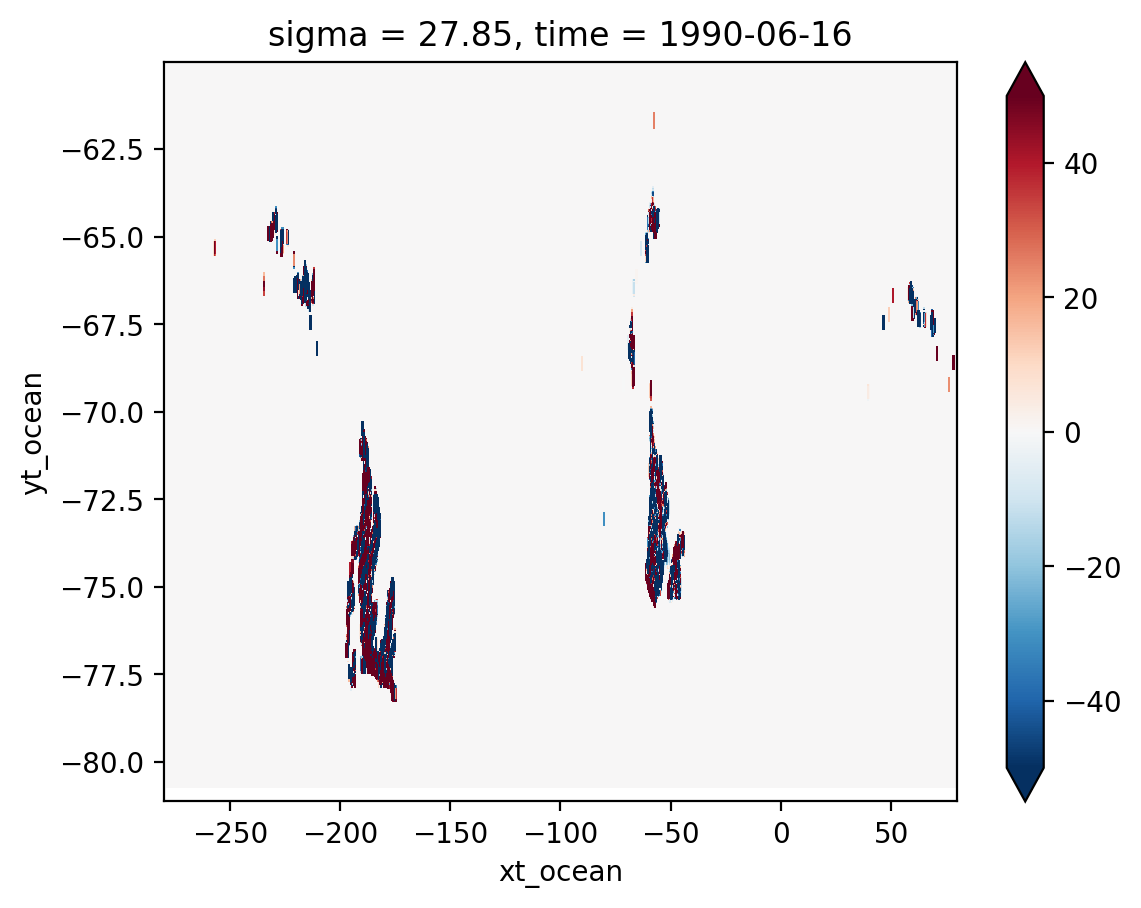

In [26]:
(Omega["Omega_temperature"] + Omega["Omega_salinity"]).isel(time = 5).sel(sigma=27.85, method="nearest").rolling(xt_ocean=10, yt_ocean=10).mean().plot(vmin=-50, vmax=50, cmap="RdBu_r")

In [56]:
Omega

<xarray.Dataset>
Dimensions:            (sigma: 19, time: 12, yt_ocean: 490, xt_ocean: 3600)
Coordinates:
  * sigma              (sigma) float64 27.67 27.68 27.69 ... 27.86 27.88 27.89
  * time               (time) datetime64[ns] 1990-01-16T12:00:00 ... 1990-12-...
  * yt_ocean           (yt_ocean) float64 -81.11 -81.07 -81.02 ... -60.1 -60.05
  * xt_ocean           (xt_ocean) float64 -279.9 -279.8 -279.7 ... 79.85 79.95
Data variables:
    Omega_temperature  (sigma, time, yt_ocean, xt_ocean) float64 ...
    Omega_salinity     (sigma, time, yt_ocean, xt_ocean) float64 ...

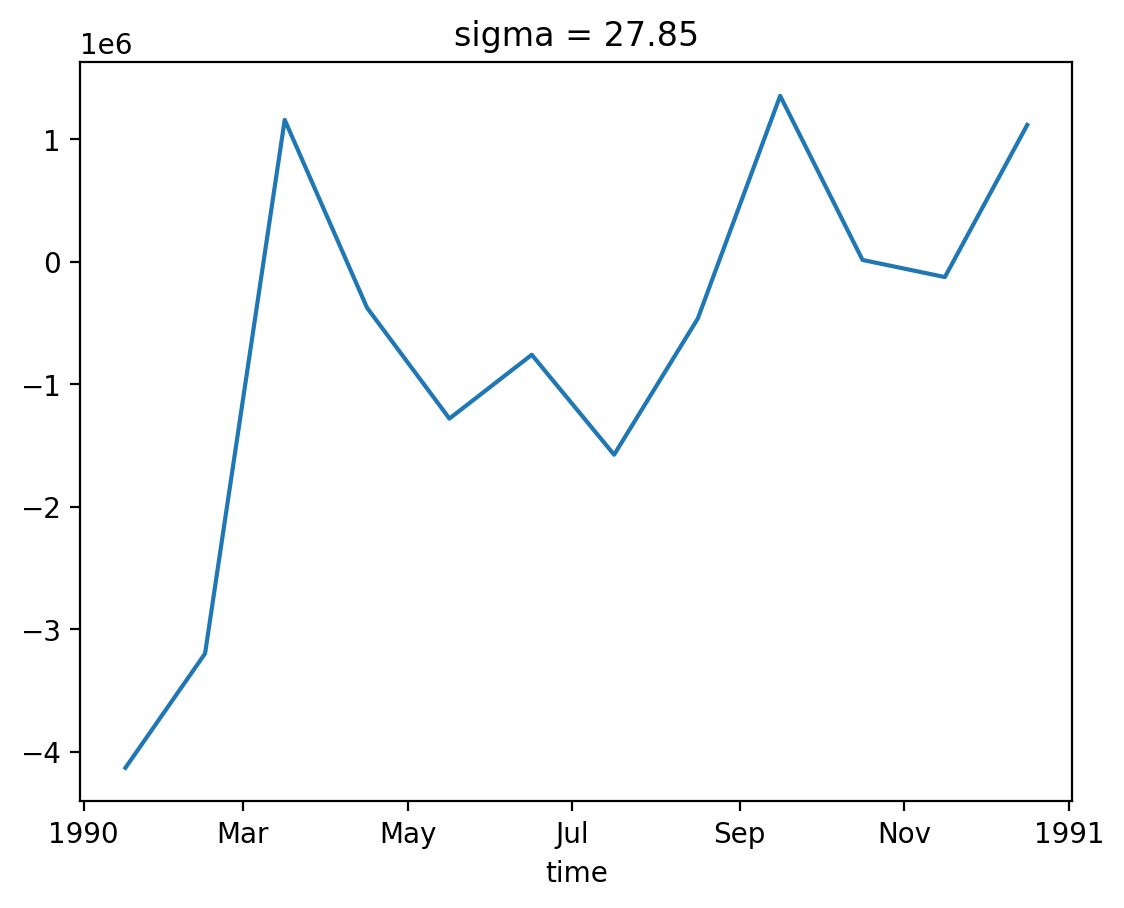

In [20]:
(Omega["Omega_temperature"] + Omega["Omega_salinity"]).sel(xt_ocean = slice(-60, 10)).sel(sigma=27.85, method="nearest").sum(["xt_ocean", "yt_ocean"]).plot()

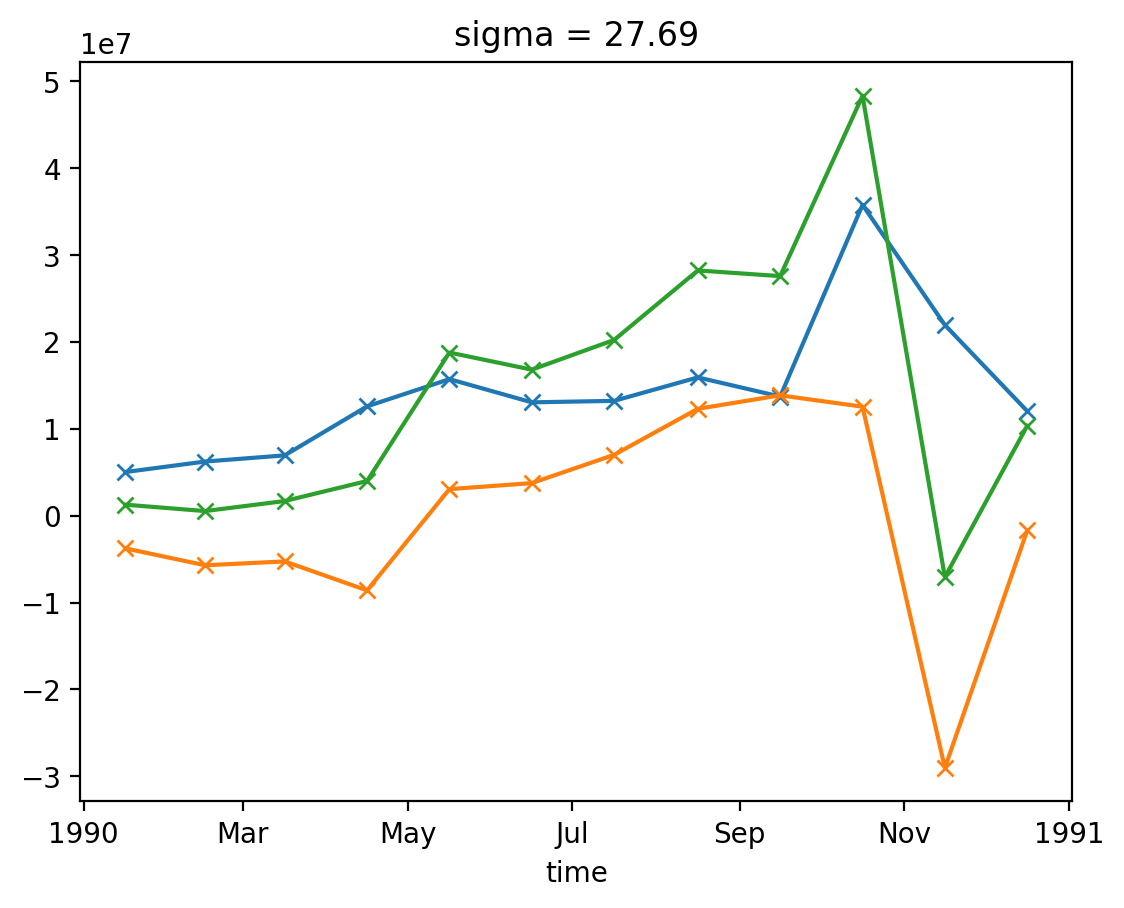

In [57]:
(Omega["Omega_temperature"]).sel(xt_ocean = slice(-60, 10)).sel(sigma=27.7, method="nearest").sum(["xt_ocean", "yt_ocean"]).plot(marker="x")
(Omega["Omega_salinity"]).sel(xt_ocean = slice(-60, 10)).sel(sigma=27.7, method="nearest").sum(["xt_ocean", "yt_ocean"]).plot(marker="x")

(Omega["Omega_temperature"] + Omega["Omega_salinity"]).sel(xt_ocean = slice(-60, 10)).sel(sigma=27.7, method="nearest").sum(["xt_ocean", "yt_ocean"]).plot(marker="x")

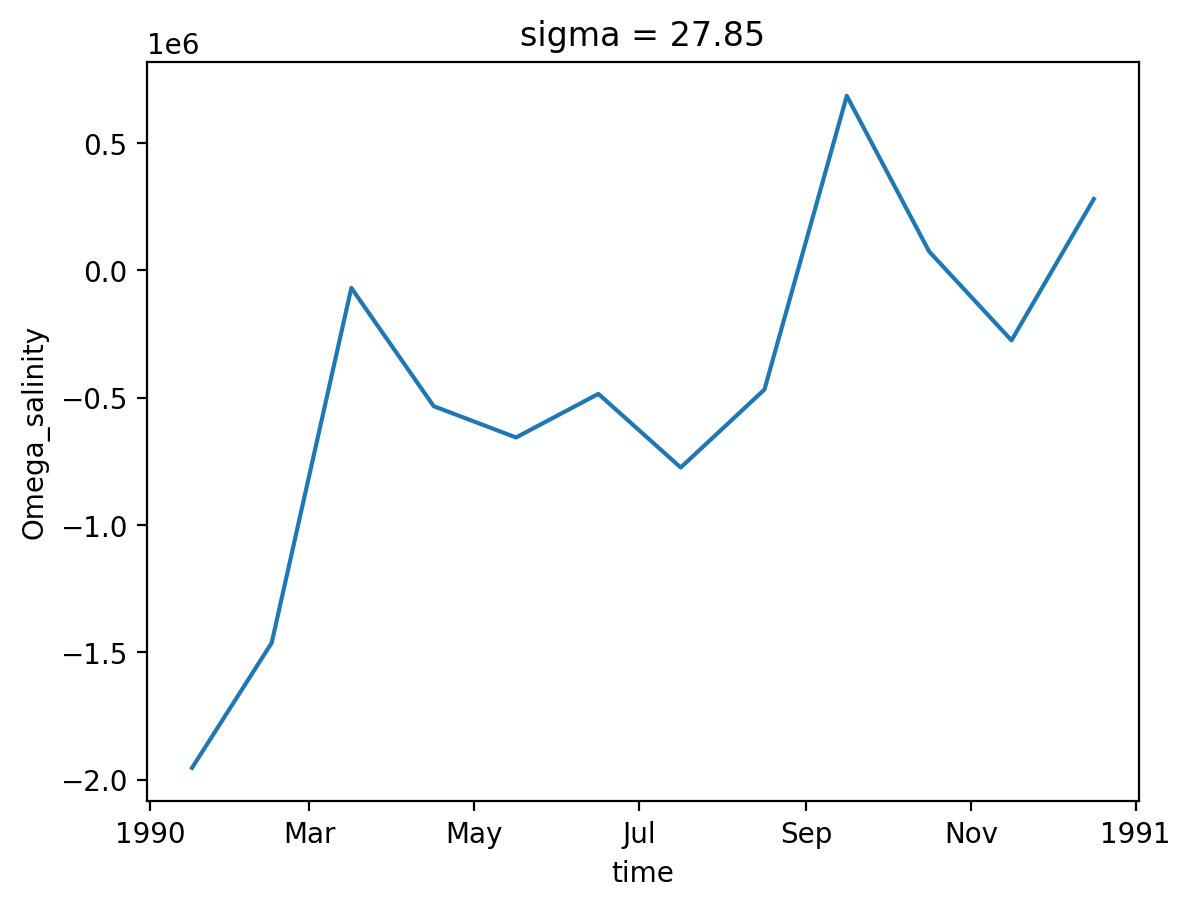

In [22]:
(Omega["Omega_salinity"]).sel(xt_ocean = slice(-60, 10)).sel(sigma=27.85, method="nearest").sum(["xt_ocean", "yt_ocean"]).plot()